# $Authors:$
* Yussuf Hersi
* Bravin Mugangasia
* Pauline Wambui.
* Kibet Kemboi
* Brian Kisilu
* Ronald Nyagaka

# Problem Statement
The business problem the client is facing is how to create a successful platform for buying and selling houses in King County. To achieve this goal, the platform needs to provide accurate estimates of house prices, which is crucial for both buyers and sellers.

To accomplish this, the client wants to use a model that can infer the most important features that determine house prices in King County. These features might include factors such as the location of the house, the number of bedrooms and bathrooms, the size of the house, and other relevant factors.

The model needs to be trained on data that accurately represents the real estate market in King County, including historical sales data, current property listings, and other relevant data sources. By using this data, the model can learn to accurately estimate the value of a house based on its features.

Once the model is trained, it can be integrated into the platform to provide buyers and sellers with accurate estimates of house prices, which can help them make informed decisions about buying or selling a property. By providing a reliable and accurate platform for buying and selling houses in King County, the client can establish themselves as a leader in the local real estate market and attract a large and loyal customer base. 

### Project Objectives 
* To identify the key features that significantly influence house prices in King County.
* To develop a model that accurately estimates house prices based on the identified features.
* To evaluate the performance of the developed model in estimating house prices in King County.


In [185]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
import folium


In [186]:
# Loading Our DataFrame
df = pd.read_csv("kc_house_data.csv")

# Viewing the First Five Rows 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [187]:
# Getting information of data types of our files 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

* The date and yr_built and yr_renovated are supposed ro be DateType Variables.
* The sqft_basement is an object and is supposed to be an int type variable. 

### Modifying the Column Data Types 

1.   Dates 

* for the purpose of analysis, we will use only the year since the changes month by month will be minor




In [188]:
# Changing the date to date time
df['date'] = pd.to_datetime(df['date'])
# Extracting only the year from the column Date
df.date = df['date'].dt.year

# Changing the dates for the year built 
df['yr_built'] = pd.to_datetime(df['yr_built'],format='%Y').dt.year

2. Sqft Basement
   
* changing the data type from object to integer values

In [189]:
# Changing the sqft_basement from object to int
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'],errors='coerce')

### Checking for Duplicates and NaN Values

In [190]:
# Checking for NaN Values as a % of the whole Data Set 

(df.isnull().sum())/len(df)*100


id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     2.102144
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

* From this we can see that there some null values in our data frame, with yr_renovated being the highest

1. NaN Value Treatment

In [191]:
# Dropping the yr_renovated column 
df.drop('yr_renovated',axis=1,inplace=True)

* yr_renovated has the highest % of NaN values ```17%```. This will be dropped since it will not be used within our model inline with the business problem. 


In [192]:
# Filling the NaN values for waterfront with NO
df.waterfront.fillna('NO',inplace=True)

* Water front feature has ```11%``` null values, this was filled with ```NO``` on the assumption that these cells were not filled since they lacked waterfronts

In [193]:
# Dropping the NaN values for View per column 
df.dropna(subset=['view'],inplace=True)

* the null values were dropped by row since the overall percentage impact would be minute

In [194]:
# Dropping the NaN values from the sqft_basement column 
df.dropna(subset=['sqft_basement'],inplace=True)

* the null values were dropped by row since the overall percentage impact would be minute

2. Duplicates 

In [195]:
# Checking for duplicate values 
df.duplicated().sum()

2

In [196]:
df[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
3947,1825069031,2014,550000.0,4,1.75,2410,8447,2.0,NO,GOOD,Good,8 Good,2060,350.0,1936,98074,47.6499,-122.088,2520,14789
20038,8648900110,2014,555000.0,3,2.50,1940,3211,2.0,NO,NONE,Average,8 Good,1940,0.0,2009,98027,47.5644,-122.093,1880,3078


* these are not true duplicates since some columns are different from one another

### Basic Exploratory Data Analysis 

In [197]:
# getting basic Statistics of our data set 
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.108200e+04,21082.000000,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,4.582793e+09,2014.323024,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,1789.000000,291.359975,1971.023337,98077.858837,47.560371,-122.213843,1986.917418,12732.514135
std,2.876423e+09,0.467643,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,828.369355,442.007858,29.323120,53.528769,0.138568,0.140607,685.544250,27148.781580
min,1.000102e+06,2014.000000,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123700e+09,2014.000000,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,1200.000000,0.000000,1952.000000,98033.000000,47.471325,-122.328000,1490.000000,5100.000000
50%,3.904970e+09,2014.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,1560.000000,0.000000,1975.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000
75%,7.312200e+09,2015.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,2210.000000,560.000000,1997.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000
max,9.900000e+09,2015.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


* The bedrooms column has a house with ```33``` rooms. This might be an outlier as it is far removed from the mean value of ```3``` room. This warrants further investigation.
* The ```id``` column will be dropped since it serves no purpose in our model.
* The ```lat``` and ```long``` columns will be dropped since it serves no purpose in our model.

### Bedrooms 

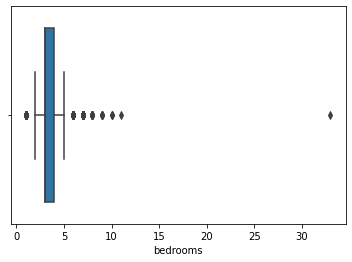

In [198]:
# Box Plot to investigate the bedrooms column
sns.boxplot(df.bedrooms);

In [199]:
# Viewing the whole row
df[df['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,580.0,1947,98103,47.6878,-122.331,1330,4700


In [200]:
df[df['bedrooms']==3].head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639


* by comparing the ```33``` bedroom house with ```3``` bedroom house, the metrics and living areas are closely related, we can conclude that this was most likely a typo and was supposed to be ```3``` bedrooms

In [201]:
# amending the bedroom variable 33 replacing it with 3 

df.bedrooms = df.bedrooms.replace(33, 3)

Dropping the ```id```, ```lat``` and ```long``` Columns

* These were dropped since they wont be used in our analysis, ```zipcode``` is representative of both ```latitude``` and ```longitude``` and ```id``` column serves no statistical basis for our analysis 

In [202]:
# drop three columns 

df.drop(['id','lat','long'],inplace = True, axis = 1)

### View column 

* changing the view columns and assigning integer scores so that we can get relevant stats on the column

In [203]:
# getting the summary all value counts in the view column

df.view.value_counts()

NONE         19018
AVERAGE        930
GOOD           496
FAIR           327
EXCELLENT      311
Name: view, dtype: int64

* These is a categorical column and we will proceed to encode these for a more useful model

In [204]:
# defining a function to cater for all categorical variables
def encode(column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [205]:
# encoding the column

encode('view')

In [206]:
# viewing if the changes are as expected with none and 1 being excellent
df.view.value_counts()

4    19018
0      930
3      496
2      327
1      311
Name: view, dtype: int64

In [207]:
# changing the data type to category

df['view'] = df['view'].astype("category")


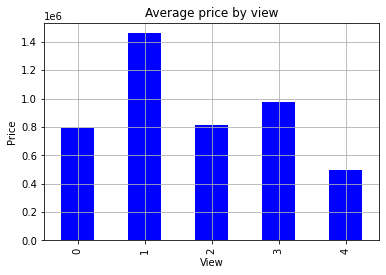

In [208]:
# grouping the price in accordance with the view column and plotting a bar graph

df.groupby('view')['price'].mean().plot(kind = 'bar', color ='b')

#plotting a bar graph to establish the trend between different views
# Set the plot title and axis labels
plt.title('Average price by view')
plt.xlabel('View')
plt.ylabel('Price')
plt.grid()
# Display the plot
plt.show()

* the price increases as the view increases, however it seems houses with a fair view ```2``` are priced higher than houses with a good view ```3```, despite fair being higher on our scale right after excellent

### Waterfront column

* getting the value counts of identifiable variables in waterfront columns and editing them if necessary

In [209]:
# getting the value counts 
df.waterfront.value_counts()

NO     20941
YES      141
Name: waterfront, dtype: int64

In [210]:
# encoding the categorical column water front
encode('waterfront')

In [211]:
# viewing the changes with 0 as no and 1 and yes

df.waterfront.value_counts()

0    20941
1      141
Name: waterfront, dtype: int64

In [212]:
# changing the data type to category

df['view'] = df['view'].astype("category")

* from this it would seem that most houses do not have a waterfront, lets explore its relationship with price

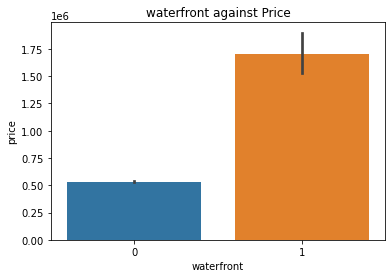

In [257]:
sns.barplot(x= df['waterfront'], y= df['price']);
plt.title('waterfront against Price');

* from this we can see that houses with waterfronts are expensive by a wide range

### grade column

* Basic understanding and analysis of grade column

In [214]:
# getting the value counts of unique items in the grade column

df.grade.value_counts()

7 Average        8762
8 Good           5922
9 Better         2546
6 Low Average    1991
10 Very Good     1108
11 Excellent      389
5 Fair            235
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [215]:
# separating the string to form integer of grade values
df.grade = df.grade.apply(lambda x: int(x.split(" ").pop(0)))


In [216]:
# changing the data type to category

df['grade'] = df['grade'].astype("category")

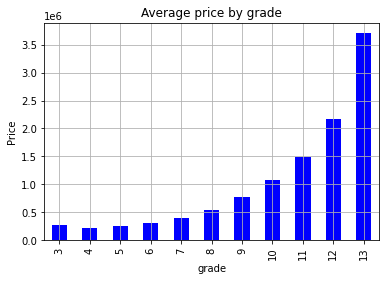

In [217]:
# plotting for grade against price
df.groupby('grade')['price'].mean().plot(kind = 'bar', color ='b')
#plotting a bar graph to establish the trend between different grades
# Set the plot title and axis labels
plt.title('Average price by grade')
plt.xlabel('grade')
plt.ylabel('Price')
plt.grid()
# Display the plot
plt.show()


* we can observe that as the grade increases so does the average price of each grouped category, and rise of price from ```3``` to ```9``` is gradual then rises sharply ```9``` to ```13```

* from this we can see that as the grade of the house increases so does the sales price

### Condition column
* transforming the column into integer scores 

In [218]:
# viewing the current values of the column
df.condition.value_counts()

Average      13688
Good          5538
Very Good     1662
Fair           166
Poor            28
Name: condition, dtype: int64

In [219]:
# transforming the data into integer scores by first creating a dictionary
cond_dict = {'Poor': 0,
             'Fair': 1,
             'Average': 2,
             'Good': 3,
             'Very Good': 4}
df.condition = df.condition.replace(cond_dict)

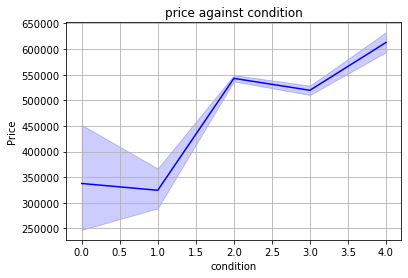

In [220]:
# getting basic visualization of conditions against price
sns.lineplot( x= 'condition', y = 'price',color = 'b', data=df)
# Set the plot title and axis labels
plt.title('price against condition')
plt.xlabel('condition')
plt.ylabel('Price')
plt.grid()
# Display the plot
plt.show()



* from this we can see that price increases as the condition of the house increases
* however it appears that houses in poor condition are priced higher than those with fair condition

### Analysis of measurement variables




In [221]:
df['home_space'] = df['sqft_living'] + df['sqft_lot'] + df['sqft_above'] + df['sqft_basement']
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,home_space
0,2014,221900.0,3,1.00,1180,5650,1.0,0,4,2,7,1180,0.0,1955,98178,1340,5650,8010.0
1,2014,538000.0,3,2.25,2570,7242,2.0,0,4,2,7,2170,400.0,1951,98125,1690,7639,12382.0
2,2015,180000.0,2,1.00,770,10000,1.0,0,4,2,6,770,0.0,1933,98028,2720,8062,11540.0
3,2014,604000.0,4,3.00,1960,5000,1.0,0,4,4,7,1050,910.0,1965,98136,1360,5000,8920.0
4,2015,510000.0,3,2.00,1680,8080,1.0,0,4,2,8,1680,0.0,1987,98074,1800,7503,11440.0


* the square foot variables all align to a single living space hence a column was created to capture this and named home_space

#### DATA VISUALIZATION OF OUR VARIABLES

In [222]:
# creating a list of all column names
plot_list = list(df.columns)
len(plot_list)

18

In [265]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(19,20))
axes = axes.flatten() # flatten the array to make it easier to iterate over

for i, xcol in enumerate(plot_list[0:19]):
    df.plot(kind='scatter', x=xcol, y='price', ax=axes[i], alpha=0.5, c=df.plot_list)
    
plt.show() # add this to display the plot

AttributeError: 'DataFrame' object has no attribute 'plot_list'

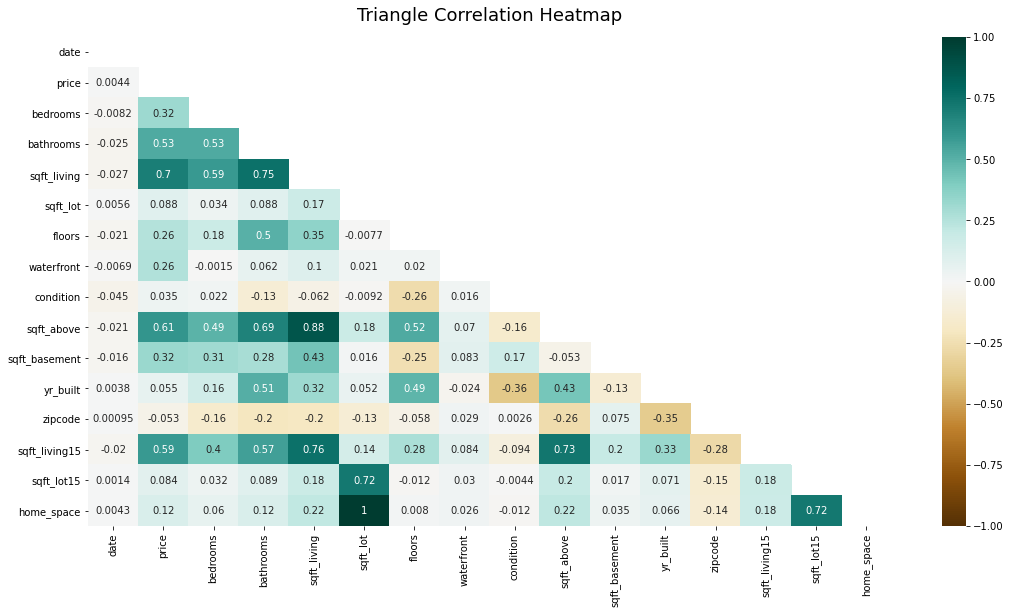

In [224]:
plt.figure(figsize=(18, 9))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

* ```date``` has no correlation with price as per our visualizations this will be dropped
* ```sqft_lot``` has a less than ```0.1``` correlation with price this will be dropped
* ```condition``` has a correlation with price of ```0.03``` this will be dropped
* ```sqft_lot15``` has a correlation of ```0.03``` against price, this will dropped
* ```yr_built``` has a correlation of ```0.05``` against price, this will dropped
* ```zipcode``` has a correlation of ```-0.05``` against price, this will dropped

##### columns to drop
* _date_
* _sqft lot_
* _condition_
* _sqft lot15_
* _yr built_
* _zipcode_
* _sqft above_
* _sqft living_
* _sqft basement_

In [225]:
# dropping the named columns 
columns_dropped = ['date','sqft_lot','sqft_lot15', 'condition','sqft_above','yr_built', 'zipcode', 'sqft_basement', 'sqft_living']

base_model_df = df.drop(columns_dropped, axis=1)


* these columns are being dropped since we have factored them in our home_space column, and the rest suxh as zipcode have been dropped due to their correlation to price being minor

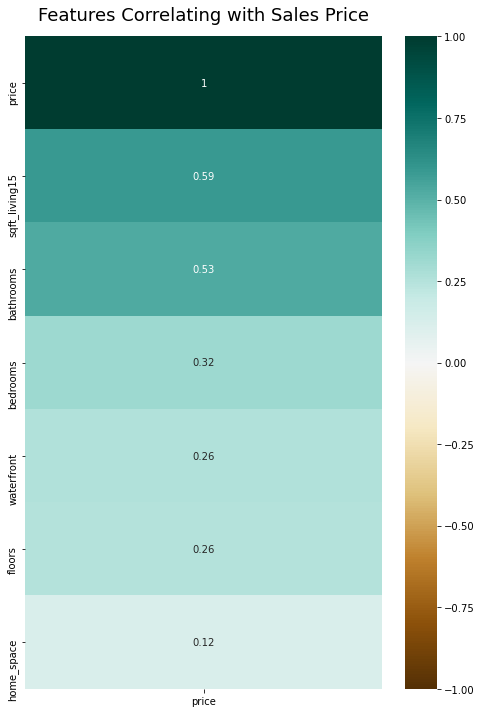

In [226]:
# visualizing our base model df
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(base_model_df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

* visualization of remaining features in descending order with square foot living 15 being the highest, this is what will be used to model of base model

### Multicollinearity of Features


In [227]:
# convert all selected features to a list
set1 = list(base_model_df.corr().index)
set1.remove('price')



In [228]:
# viewing multicolinearity between features

# defining the specific data frame we will test for multicollinear relationship
coll_df = base_model_df.loc[:,set1]

# getting the overall mean of each feature's collinearity with other features
print(coll_df.corr().mean().sort_values())

waterfront       0.198283
home_space       0.231710
floors           0.332580
bedrooms         0.362229
sqft_living15    0.418633
bathrooms        0.463953
dtype: float64


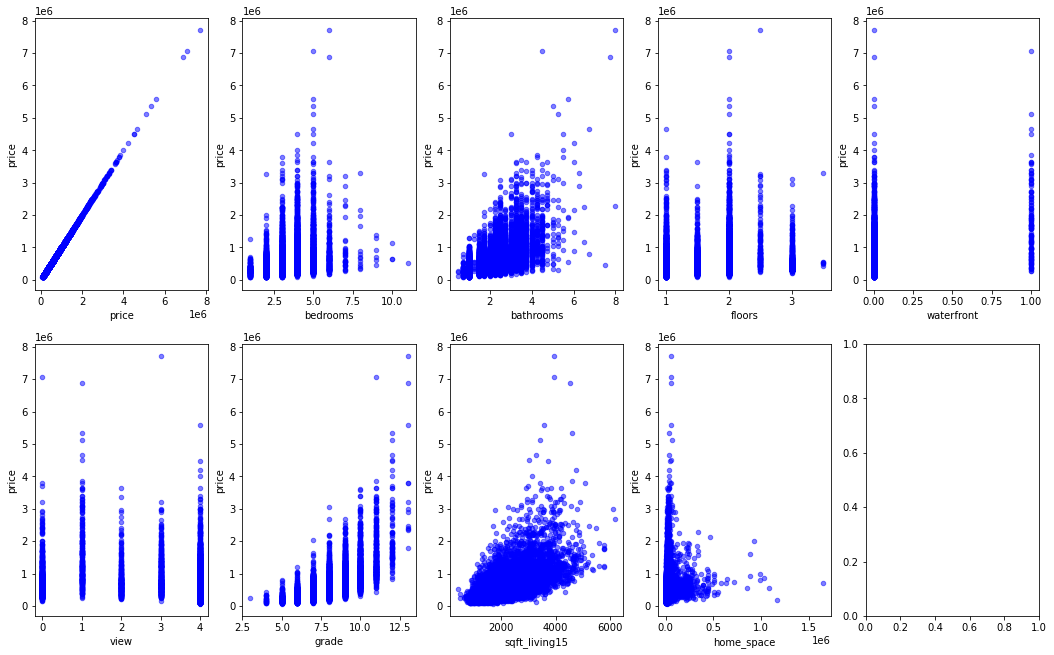

In [229]:

plot_list2 = list(base_model_df.columns)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18,11))
axes = axes.flatten() # flatten the array to make it easier to iterate over

for i, xcol in enumerate(plot_list2[0:11]):
    df.plot(kind='scatter', x=xcol, y='price', ax=axes[i], alpha=0.5, color='b')

### Base Model

In [230]:
y = base_model_df['price']
x = base_model_df[['bedrooms','bathrooms','floors','waterfront','view','grade','sqft_living15', 'home_space']]
base_mod = sm.OLS(y, sm.add_constant(x)).fit()
base_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     3039.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:49:11   Log-Likelihood:            -2.9194e+05
No. Observations:               21082   AIC:                         5.839e+05
Df Residuals:                   21073   BIC:                         5.840e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.394e+05   1.62e+04    -39.539      0.000   -6.71e+05   -6.08e+05
bedrooms       9605.9690   2291.887      4.191      0.000    5113.695    1.41e+04
bathrooms      5.981e+04   3511.802     17.031      0.000    5.29e+04    6.67e+04
floors        -4.773e+04   3844.797    -12.415      0.000   -5.53e+04   -4.02e+04
waterfront     7.946e+05   2.17e+04     36.562      0.000    7.52e+05    8.37e+05
view          -4.743e+04   1978.323    -23.974      0.000   -5.13e+04   -4.36e+04
grade          1.434e+05   2421.759     59.203      0.000    1.39e+05    1.48e+05
sqft_living15    83.5764      3.761     22.222      0.000      76.204      90.948
home_space       -0.0344      0.042     -0.813      0.416      -0.117       0.048
==============================================================================
Omnibus:                    17842.206   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1745526.571
Skew:                           3.549   Prob(JB):                         0.00
Kurtosis:                      47.009   Cond. No.                     5.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* An R-squared score of 0.536 suggests that the independent variable or variables in the model can account for around 53.6% of the variability in the dependent variable.
* it would appear that home_space p_values ```0.416 ``` is more than our alpha of ```0.05``` , this would mean that the feature is statistically insignificant to be used as variable in our model. this will be dropped

### Checking for assumptions.

1. Linearity: Check for linearity by plotting the dependent variable against each independent variable. If the relationship appears to be nonlinear, we  may need to transform one or more variables or use a different type of model.

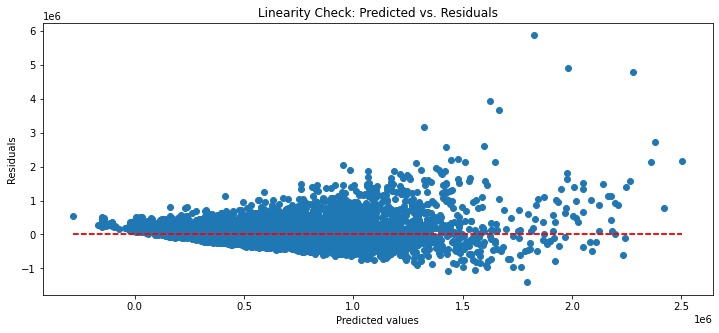

In [231]:

# plotting predicted values vs. residuals
def linearity_check(model):
    model_fitted_y = model.fittedvalues
    model_residuals = model.resid
    fig, ax = plt.subplots(figsize=(12,5))
    _ = ax.scatter(model_fitted_y, model_residuals)

    # adding horizontal line at y=0
    ax.hlines(y=0, xmin=model_fitted_y.min(), xmax=model_fitted_y.max(), colors='r', linestyles='--')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Linearity Check: Predicted vs. Residuals')
    ax.hlines(y=0, xmin=model_fitted_y.min(), xmax=model_fitted_y.max(), colors='r', linestyles='--')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Linearity Check: Predicted vs. Residuals')
    plt.show()

linearity_check(base_mod)



*  The model is not linear as the residuals are not randomly distributed around the horizontal line at y=0.

2. Normality: Check for normality of residuals by plotting a histogram of the residuals and examining whether they are normally distributed. We can also use a normal probability plot or a statistical test such as the Shapiro-Wilk test.

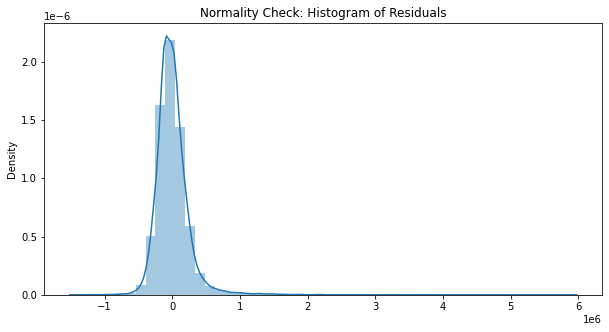

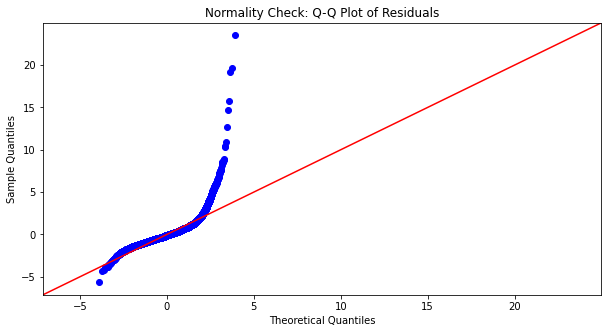

In [232]:
import scipy.stats as stats



# plotting histogram of residuals
def normality_check(residuals):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.distplot(residuals)
    ax.set_title('Normality Check: Histogram of Residuals');
    
    fig, ax = plt.subplots(figsize=(10,5))
    _ = sm.qqplot(residuals, fit=True, line='45', ax=ax)
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    ax.set_title('Normality Check: Q-Q Plot of Residuals');
    plt.show()



normality_check(base_mod.resid)


*  The model is not linear as the residuals are not normally distributed

3. Homoscedasticity: Check for homoscedasticity (equal variance) of residuals by plotting the residuals against the predicted values. If the residuals appear to fan out or form a funnel shape, this indicates heteroscedasticity (unequal variance) and may require a transformation or a different model.

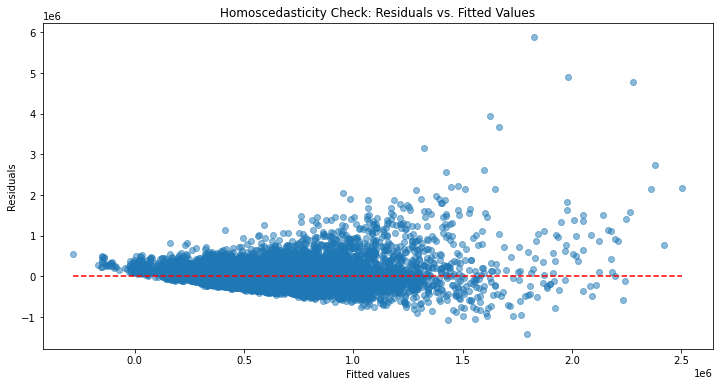

In [233]:
# plotting residuals vs. fitted values
def homoscedasticity_check(model):
    model_residuals = model.resid
    model_fitted_y = model.fittedvalues
    fig, ax = plt.subplots(figsize=(12,6))
    _ = ax.scatter( model_fitted_y,model_residuals, alpha=.5)

    # add horizontal line at y=0
    ax.hlines(y=0, xmin=model_fitted_y.min(), xmax=model_fitted_y.max(), colors='r', linestyles='--')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Homoscedasticity Check: Residuals vs. Fitted Values')
    plt.show()

homoscedasticity_check(base_mod)

* The spread of residuals is not consistent throught the range hence it is heterocedastic since it forms a funnel shape

4. Independence: Check for independence of residuals by plotting the residuals against the order in which they were observed or against time (if applicable). If there is a pattern or correlation, this indicates that the model may not be capturing all relevant information.

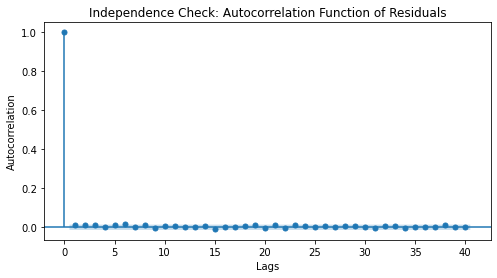

In [234]:
# plotting autocorrelation function of residuals
def independence_check(residuals):
    fig, ax = plt.subplots(figsize=(8,4))
    _ = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax)
    ax.set_xlabel('Lags')
    ax.set_ylabel('Autocorrelation')
    ax.set_title('Independence Check: Autocorrelation Function of Residuals')
    plt.show()

independence_check(base_mod.resid)

* Their is a temporary difference in the residuals
* The presence of one pick outside the confidence intervals suggests pressence of signifince of autocorrelation in the residuals indicating that the model is not capturing all the temporal dependence in the data.

In [235]:
from sklearn.linear_model import LinearRegression

# Define a function named "train_test" that takes two input parameters, x and y.
def train_test(x,y):
    
    # Split the input data into training and testing sets using the "train_test_split" method from scikit-learn.
    # Use a test size of 0.3 and a random state of 42.
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    
    # Create a LinearRegression object and train it using the training data.
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    
    # Make predictions using the trained model for both the training and testing data.
    y_hat_train = linreg.predict(x_train)  # these are our prediction values
    y_hat_test = linreg.predict(x_test)
    
    # Print the R-squared value for the testing data.
    print('the r2_score:', r2_score(y_test, y_hat_test), '\n')
    
    # Calculate the mean absolute error and mean squared error for both the training and testing data.
    train_mae = mean_absolute_error(y_train, y_hat_train)
    test_mae = mean_absolute_error(y_test, y_hat_test)
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    
    # Print the mean absolute error and mean squared error for both the training and testing data.
    print('train MAE:', train_mae)
    print('test MAE:', test_mae, '\n')
    print('train MSE:', train_mse)
    print('test MSE:', test_mse, '\n')
    
    # Print the root mean squared error for both the training and testing data.
    print('train root Mean squared Error: ', train_mse** 0.5)
    print('test root Mean squared Error: ', test_mse** 0.5, '\n')
    
    # Create a scatter plot comparing the predicted values to the actual values for both the training and testing data.
    plt.scatter(y_train, y_hat_train,alpha=0.5,color='y',label='train')
    sns.regplot(x=y_train, y=y_hat_train, scatter=False, color='r',label='train')
    plt.scatter(y_test, y_hat_test,label='test')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual Price vs Predicted Price')
    plt.scatter(x=y, y=y,color ='maroon',label='actual')
    plt.legend()
    
    # Create a new LinearRegression object and train it using the training data.
    ml =LinearRegression()
    ml.fit(x_train,y_train)
    
    # Use the new model to make predictions for the testing data.
    y_pred = ml.predict(x_test)
    
    # Create a DataFrame containing the actual values, predicted values, difference, and percentage difference for the testing data.
    pred_y_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Value' : y_pred, 'Difference' :abs(y_test-y_pred) , 'Percentage Difference' : abs((y_test-y_pred)/y_test*100)})
    
    # Calculate the mean percentage difference between the actual and predicted values for the testing data.
    mean_percentage = pred_y_df['Percentage Difference'].mean()
    
    # Print the mean percentage difference for the testing data.
    print('mean_diff:', mean_percentage)

    return pred_y_df[0:5]



In [236]:
x = base_model_df.drop(['price'], axis=1)
y = base_model_df.price

the r2_score: 0.5492747495791892 

train MAE: 163711.64359888132
test MAE: 164276.26894363877 

train MSE: 62895341156.27189
test MSE: 61500100948.07352 

train root Mean squared Error:  250789.4358944808
test root Mean squared Error:  247992.1388836217 

mean_diff: 34.38441245535503


,Actual Values,Predicted Value,Difference,Percentage Difference
4000,282500.0,372241.105596,89741.105596,31.766763
13454,520000.0,399414.040805,120585.959195,23.189608
6911,546000.0,302448.202699,243551.797301,44.606556
12662,345000.0,468898.992303,123898.992303,35.912751
2924,265000.0,330622.165929,65622.165929,24.763081


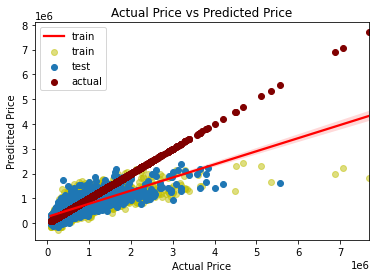

In [237]:
train_test(x,y)


* The R-squared value (r2_score) is a measure of how well the model fits the data, with values closer to 1 indicating a better fit. In this case, the r2_score is 0.54927 which suggests that the model explains 55% of the variability in the target variable.

* The mean absolute error (MAE) is a measure of the average magnitude of errors in the predictions made by the model. The lower the MAE, the better the model. The train MAE and test MAE are 163711.64 and 164276, respectively, which are quite large values, indicating that the model is not performing well.

* The root mean squared error (RMSE) is the square root of the MSE, and it measures the average magnitude of the error in the model's predictions. The train RMSE and test RMSE are 250,789 and 247,992, respectively, which are also quite large.

Overall, these metrics suggest that the linear regression model is not performing very well in making accurate predictions on the dataset.

In [238]:
# dropping the home_space feature as per the suggestion above
base_model_df = base_model_df.drop(columns='home_space')

### Linear Transformation 

1. Log Transformation Model 

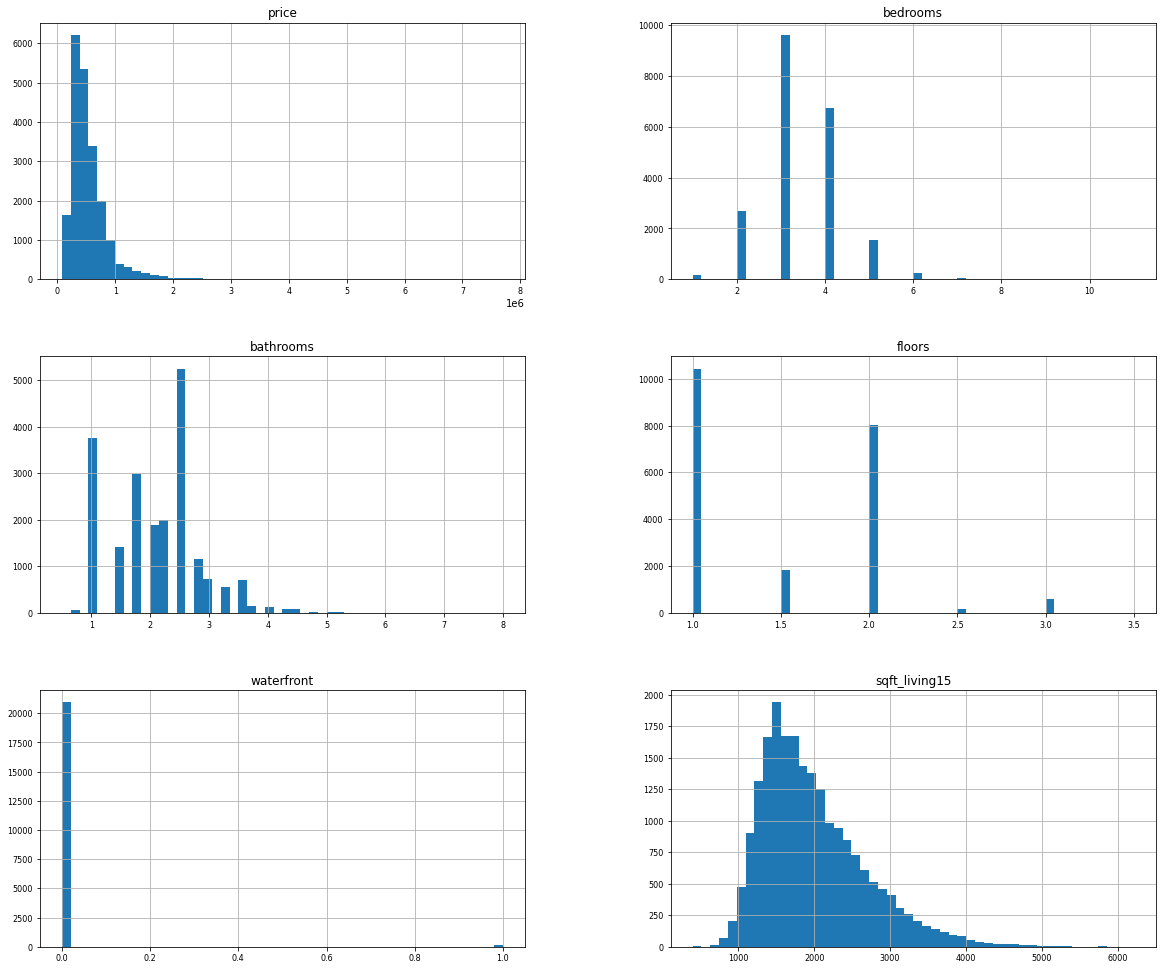

In [239]:
# Copying the base model dataframe
log_model_df = base_model_df.copy()

# Plotting histograms of all the variables
log_model_df.hist(figsize=(20,17), bins=50, xlabelsize=8, ylabelsize=8);

In [240]:
colums_transform = ['price']

for col in colums_transform:
    log_model_df[col] = np.log(log_model_df[col])

log_model_df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,grade,sqft_living15
0,12.309982,3,1.00,1.0,0,4,7,1340
1,13.195614,3,2.25,2.0,0,4,7,1690
2,12.100712,2,1.00,1.0,0,4,6,2720
3,13.311329,4,3.00,1.0,0,4,7,1360
4,13.142166,3,2.00,1.0,0,4,8,1800


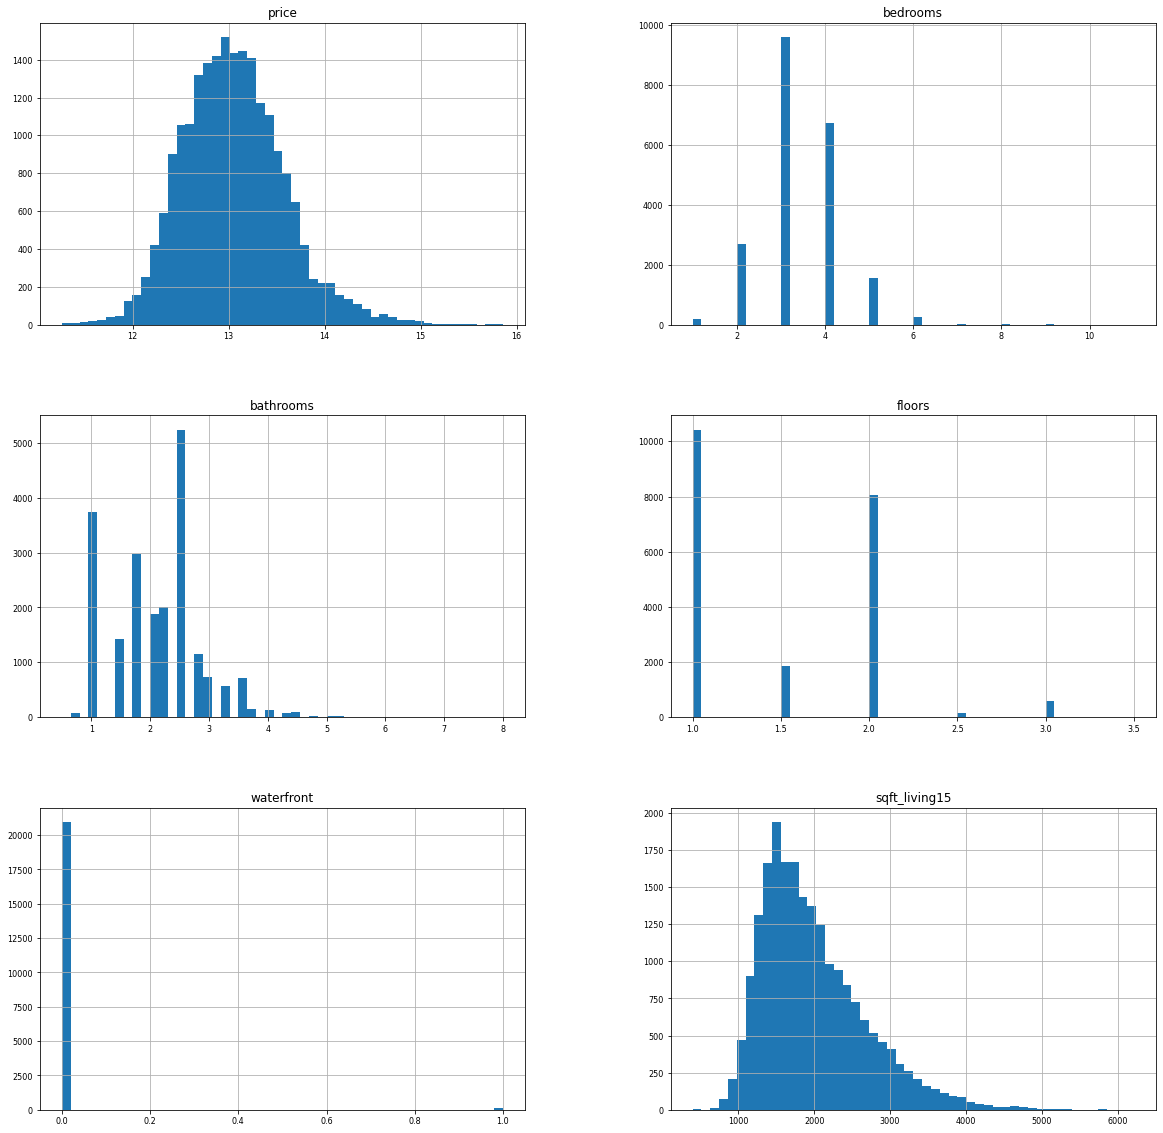

In [241]:
# Plotting histograms of all log transformed variables
log_model_df.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8);

the r2_score: 0.5506186047214614 

train MAE: 0.2823444855992954
test MAE: 0.28482552442797315 

train MSE: 0.12282266391462458
test MSE: 0.12564125298475476 

train root Mean squared Error:  0.3504606453150262
test root Mean squared Error:  0.3544590991704893 

mean_diff: 2.1876134823969697


,Actual Values,Predicted Value,Difference,Percentage Difference
4000,12.551434,12.815916,0.264482,2.107185
13454,13.161584,12.809386,0.352198,2.675956
6911,13.210374,12.668910,0.541464,4.098777
12662,12.751300,12.981514,0.230215,1.805422
2924,12.487485,12.755574,0.268089,2.146859


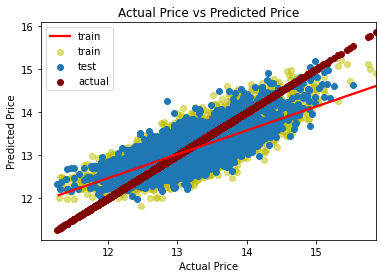

In [242]:
# Defininf the target and features
y_l = log_model_df.price
X_l = log_model_df.drop('price', axis=1)

# train test 
train_test(X_l,y_l)

* An R2 score of ```0.55``` indicates that the model explains ```557%``` of the variance in the logarithmic actual values.
* An MAE value of ```0.282``` for train data and ```0.284``` for test data suggest that, on average, the model's logarithmic predictions are off by about ```28.2%```and ``28.4`` respectively from the logarithmic actual values.
* An MSE value of``` 0.1228``` for train data and an MSE of `0.1256` for test data suggest that, on average, the model's logarithmic predictions are off by the squared value of about `12.28%` and `12.56%` respectively from the logarithmic actual values.
* An RMSE value of `0.3504` for train data and `0.3544` for test data suggest that, on average, the model's logarithmic predictions are off by the squared root value of about ```35.04%``` and ```35.44%``` respectively from the logarithmic actual values

In [243]:
# Fitting the model
y = log_model_df.price
x = log_model_df.drop('price', axis=1)
log_model = sm.OLS(y, sm.add_constant(x)).fit()

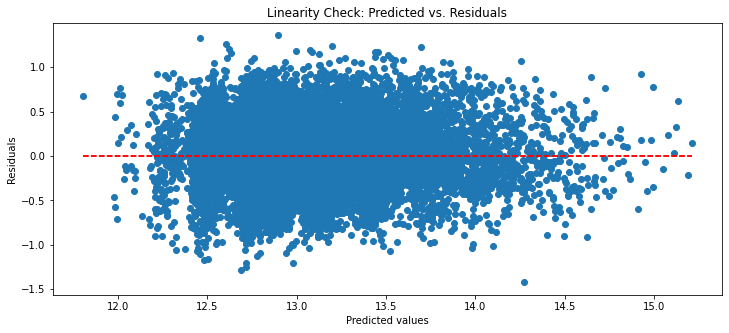

In [244]:
# Linearity Check
linearity_check(log_model)

* from the visualization our model is not linearly distributed

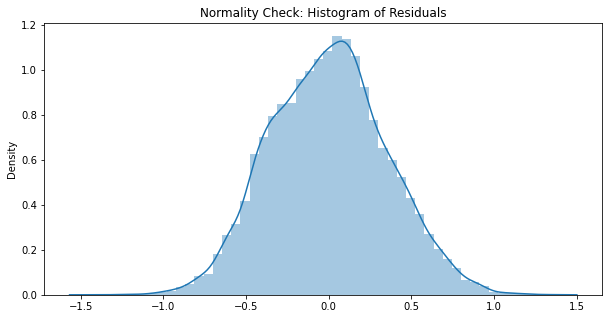

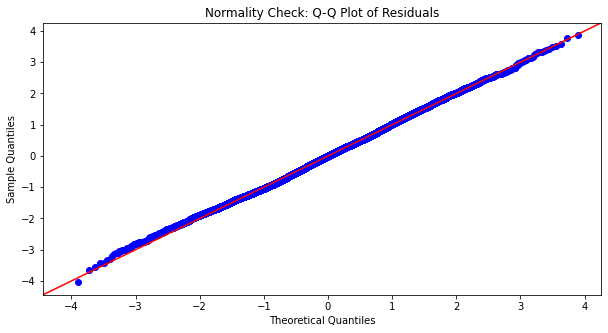

In [245]:
# Normality Check
normality_check(log_model.resid)

* graphs suggest that the residuals here are normally distributed compared to the base model, this is an improvement compared to the base model. 

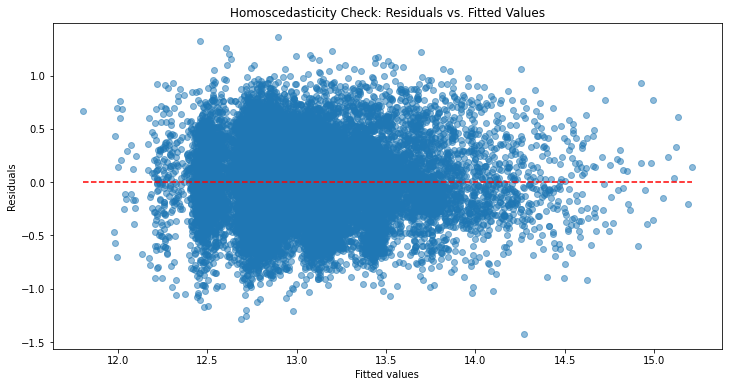

In [246]:
# Homoscedasticity Check
homoscedasticity_check(log_model)

* the scatter plot of the residuals against the fitted show a random pattern of points that are roughly evenly distributed around the horizontal line, this passes the Homoscedasticity of linearity assumption 

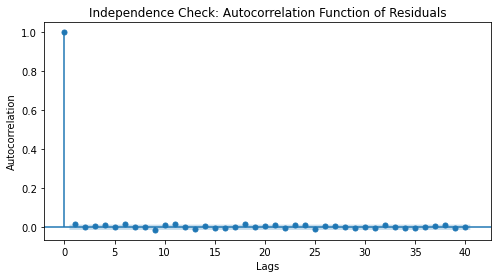

In [247]:
# Independence Check
independence_check(log_model.resid)

* Their is a temporary difference in the residuals
* The log model model is better than the base model because it meets three of the four linearity tests. 
* Judging by the R Squired of the two models the log model is slightly higher than the base model meaning it does a better job of accounting for the variables, furthermore the log model meets three of the four assumptions of linearity making it more linear compared to the base model, Hence this might be a truer prediction of price.

2. Polynomial Features model

In [248]:
# Copying the base model dataframe
poly_model_df = base_model_df.copy()

# Defining the target and features
y_p = poly_model_df.price
X_p = poly_model_df.drop('price', axis=1)

# creating all polynomial combinations of the existing features up to degree 2
polynomial = PolynomialFeatures(degree=2,include_bias=False)

# fitting and transforming the data
poly_features = polynomial.fit_transform(X_p)


the r2_score: 0.6444540420077496 

train MAE: 147506.6558545654
test MAE: 149612.02104801193 

train MSE: 49003167468.374535
test MSE: 48513173574.78429 

train root Mean squared Error:  221366.5906779398
test root Mean squared Error:  220257.06248559724 

mean_diff: 31.36543102750547


,Actual Values,Predicted Value,Difference,Percentage Difference
4000,282500.0,341268.365600,58768.365600,20.802961
13454,520000.0,356835.692090,163164.307910,31.377752
6911,546000.0,325730.614794,220269.385206,40.342378
12662,345000.0,415417.324785,70417.324785,20.410819
2924,265000.0,340360.004312,75360.004312,28.437737


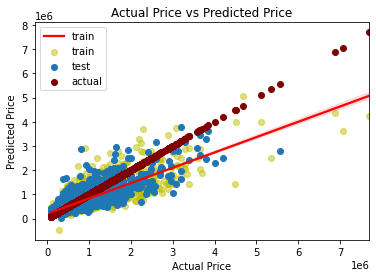

In [249]:
# training and testing the model
train_test(poly_features,y_p)

* The r2_score is ```0.64```, indicating that the model explains about ```64%``` of the variation in the target variable.
  
* The train MAE is `147506.65` and the test MAE is 149612. This means that, on average, the model's predictions are off by about `$147,506` in the training data and `$149,612` in the test data.
  
* The train RMSE is `221366.59` and the test RMSE is `220257.06`. The RMSE is in the same units as the target variable, and it can be interpreted as the average absolute difference between the actual and predicted values, after taking into account the scale of the target variable.

_In summary, these metrics can be used to evaluate the performance of the model. In this case, the model has a decent r2_score, but its MAE and RMSE indicate that there is still room for improvement in the model's predictive accuracy_

In [250]:
# Fitting the model
y = poly_model_df.price
x = poly_model_df.drop('price', axis=1)
poly_model = sm.OLS(y, sm.add_constant(x)).fit()

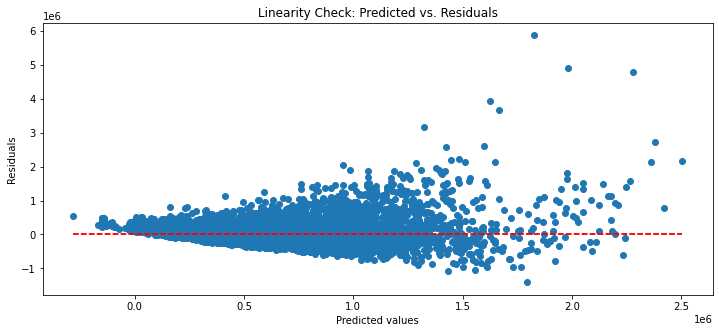

In [251]:
# Linearity Check
linearity_check(poly_model)


*  The model is not linear 

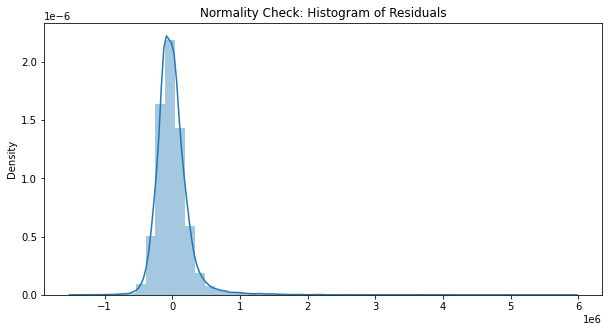

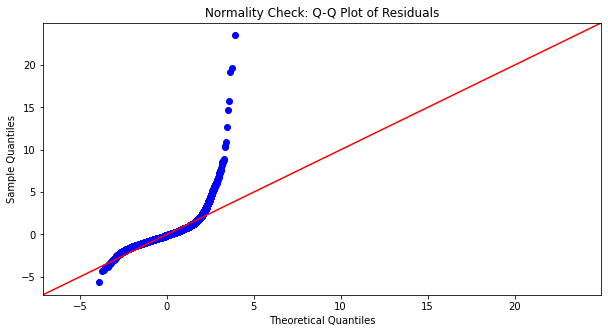

In [252]:
# Normality Check
normality_check(poly_model.resid)


* graphs suggest that the residuals slightly normally distributed compared to the base model, this is an improvement compared to the base model but worse than the log model

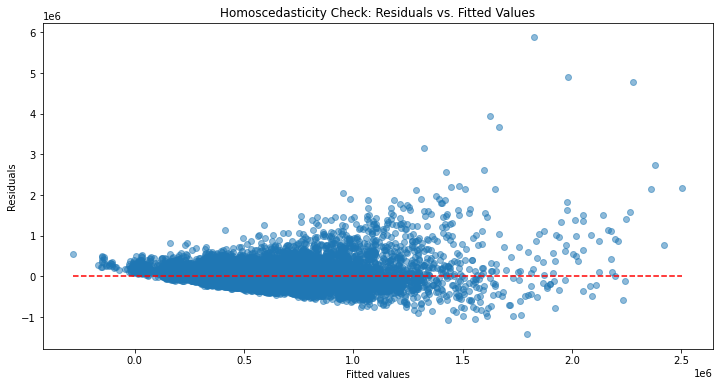

In [253]:
# Homoscedasticity Check
homoscedasticity_check(poly_model)

* The spread of residuals is not consistent throughout the range hence it is heterocedastic since it forms a funnel shape

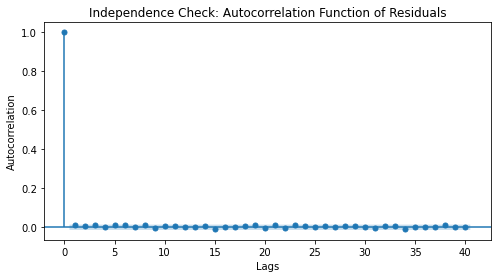

In [254]:
# Independence Check
independence_check(poly_model.resid)

* There is a temporary difference in the residuals, indicating a deviation from normality that may resolve itself with additional data points.

## CONCLUSIONS

* The ```pylonomial model``` in the given output performed reasonably well in predicting house prices, but there is room for improvement.
  
* The R-squared value indicates that the model explains 64% of the variance in the data, while the Mean Absolute Error is around $147,000, which means that on average, the model's predictions are off by $147,000. 

* The high values of `MSE`, `RMSE`, and `MAE` suggest that the model's predictions may be quite far off for some instances. The `Log Transformation Model` and `base Model` were outperformed by this model, but further improvements can be made by exploring other models or feature engineering.

## RECOMMENDATIONS
* As a recommendation, it would be useful to perform further analysis to identify the features that are driving the model's predictions and consider incorporating new features that may improve the model's performance. 

* Some features can also be considered when determining house prices. These features such as higher house `grades`, houses with better `views`, better `condition`, and the presence of a `waterfront` increase the value of the house.

* Finally, it may be useful to gather more data to train the model and increase the size of the training set to get more accurate predictions
